In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
consu = pd.read_csv('tabela.csv')

In [6]:
consu.head()

,Dia,Hora,Refeição,Valor,Consumidor,Operador
0,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
1,2019-03-01,06:46:00,Café da Manhã,0.0,Bolsista,SOLANGE DE OLIVEIRA BANDEIRA
2,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
3,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
4,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA


(array([3.50348e+05, 4.53330e+04, 3.21600e+03, 7.87200e+03, 0.00000e+00,
        1.87400e+03, 3.23800e+03, 2.30000e+01, 2.00000e+00, 2.20000e+02]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

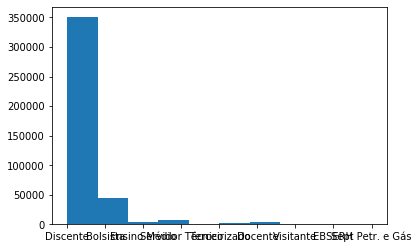

In [5]:
plt.hist(consu['Consumidor'])

In [6]:
consu['Consumidor'].value_counts()

Discente            350348
Bolsista             45333
Servidor Técnico      7872
Docente               3238
Ensino Médio          3216
Terceirizado          1874
Sept Petr. e Gás       220
Visitante               23
EBSERH                   2
Name: Consumidor, dtype: int64

In [2]:
matrix = pd.read_csv('consumidor_min.csv')

In [48]:
np.transpose(matrix)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
Hora,06:45,06:46,06:47,06:48,06:49,06:50,06:51,06:52,06:53,06:54,...,19:26,19:27,19:28,19:29,19:30,19:31,19:32,19:33,19:34,19:35
Hora_n,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,768,769,770
Refeição,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,Café da Manhã,...,Jantar,Jantar,Jantar,Jantar,Jantar,Jantar,Jantar,Jantar,Jantar,Jantar
Média,1.64557,7.49367,5.05063,3.60759,3.37975,3.32911,3.91139,4.24051,4.88608,5.20253,...,4.79747,4.36709,4.03797,3.75949,2.4557,1.06329,0.443038,0.265823,0.113924,0.0506329
2019-03-01,0,5,10,0,4,5,3,3,2,5,...,1,1,3,3,3,0,3,0,0,0
2019-03-07,1,9,1,0,4,3,3,7,3,7,...,1,2,2,1,3,1,1,0,0,0
2019-03-08,7,2,4,3,5,2,0,6,4,0,...,0,7,0,1,1,0,0,0,0,0
2019-03-11,0,6,11,6,7,5,3,2,8,5,...,2,2,2,2,4,2,0,0,0,0
2019-03-12,1,13,9,6,4,8,9,4,3,6,...,19,11,2,6,3,0,0,0,0,0
2019-03-13,0,13,1,3,3,1,4,4,5,4,...,6,26,21,16,2,0,0,0,0,0


In [3]:
def transforma(text, ida = 1):
    if ida == 1:
        h,m = int(text[:2]),int(text[3:])
        return (60*h + m) - 405
    else:
        return str(int((text + 405)/60)) + ':' + str(int((text + 405)%60))

In [4]:
dia_sem = {0:'sex', 3:'seg', 4:'ter', 5:'qua', 6:'qui'}
text_num = {'seg':0, 'ter':1, 'qua':2, 'qui':3, 'sex':4}
def dia(texto, text = 1, dic = dia_sem, num = text_num): #pra mudar as datas da tabela
    dic = dia_sem
    dia,mes = int(texto[8:]), int(texto[5:7]) #pega o dia/mês
    if mes%2 == 1: #mês com 31 dias
        if text == 1:
            return dic[(dia-(1 + mes - 3))%7]
        else:
            return num[dic[(dia-(1 + mes - 3))%7]]
    else: #mês com 30 dias
        if text == 1:
            return dic[(dia+(2 - mes - 3))%7]
        else:
            return num[dic[(dia+(2 - mes - 3))%7]]

In [5]:
sns.set()
sns.set_context('talk')

In [6]:
matrix.describe()

,Hora_n,Média,2019-03-01,2019-03-07,2019-03-08,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,...,2019-06-14,2019-06-17,2019-06-18,2019-06-19,2019-06-21,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,392.445312,13.585377,12.716146,14.046875,13.187500,16.411458,17.039062,16.510417,16.455729,15.565104,...,7.309896,12.307292,12.880208,12.765625,1.398438,7.190104,7.872396,6.598958,7.963542,7.361979
std,250.998969,9.130638,10.501530,10.724798,11.568899,11.458062,12.766472,12.865437,11.991865,12.416444,...,7.146385,9.956529,10.234648,11.071911,2.548762,6.729601,7.235817,6.324605,6.781462,6.795922
min,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,253.750000,6.170886,4.000000,4.750000,4.000000,6.000000,5.000000,5.000000,6.000000,5.000000,...,2.000000,4.000000,4.000000,4.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,349.500000,11.411392,10.500000,13.000000,9.000000,17.000000,17.000000,14.000000,14.000000,12.000000,...,5.000000,9.000000,11.000000,9.000000,0.000000,5.000000,6.000000,4.000000,6.000000,5.000000
75%,674.250000,23.420886,20.000000,21.000000,23.250000,27.000000,29.000000,29.000000,28.000000,26.250000,...,11.000000,20.250000,19.000000,23.000000,2.000000,11.000000,12.000000,10.000000,12.000000,12.000000
max,770.000000,31.379747,38.000000,37.000000,41.000000,39.000000,42.000000,41.000000,40.000000,41.000000,...,38.000000,34.000000,39.000000,41.000000,15.000000,34.000000,33.000000,29.000000,28.000000,26.000000


In [11]:
consu['Dia'].unique()

array(['2019-03-01', '2019-03-07', '2019-03-08', '2019-03-11',
       '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15',
       '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
       '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
       '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02',
       '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-08',
       '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
       '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
       '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
       '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-02',
       '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08',
       '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14',
       '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20',
       '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
       '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
       '2019-06-04', '2019-06-05', '2019-06-06', '2019-

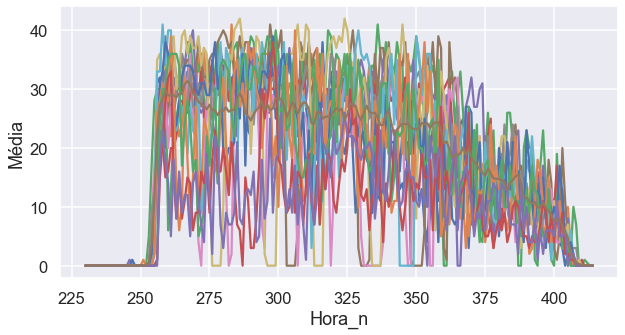

In [47]:
plt.subplots(figsize=(10, 5))
for l in consu['Dia'].unique():
    if dia(l) == 'sex' and np.sum(matrix[l]) >= 2000:
        sns.lineplot(y=l, x = 'Hora_n' ,data = matrix[matrix['Refeição'] == 'Almoço'])
sns.lineplot(y= 'Média', x = 'Hora_n' ,data = matrix[matrix['Refeição'] == 'Almoço'])

#clusterização utilizando quartis e médias móveis de cada dia  

In [38]:
alo = []
for k in consu['Dia'].unique():
    alo.append(dia(k))

In [ ]:
alo

In [ ]:
pd.concat([matrix,alo])

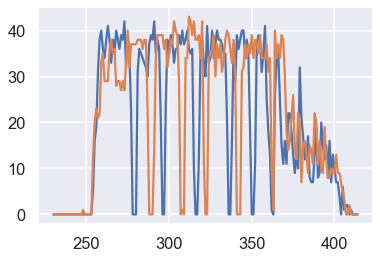

In [18]:
plt.plot(matrix[matrix['Refeição'] == 'Almoço']['Hora_n'], matrix[matrix['Refeição'] == 'Almoço']['2019-04-24'])
plt.plot(matrix[matrix['Refeição'] == 'Almoço']['Hora_n'], matrix[matrix['Refeição'] == 'Almoço']['2019-04-23'])

In [33]:
vet = []
h = []
for k in range(5,384,5):
    vet.append(np.sum(matrix['2019-04-24'][k-5:k]))
    h.append(matrix['Hora_n'][k-5])
vet.append(np.sum(matrix['2019-04-24'][380:]))
h.append((matrix['Hora_n'][383]))

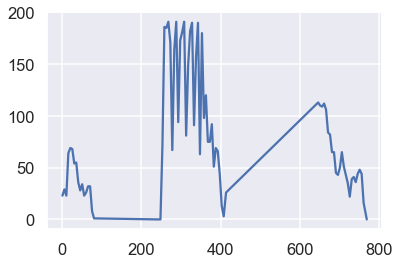

In [89]:
plt.plot(h,vet)

In [7]:
matrix.head()

,Hora,Hora_n,Refeição,Média,2019-03-01,2019-03-07,2019-03-08,2019-03-11,2019-03-12,2019-03-13,...,2019-06-14,2019-06-17,2019-06-18,2019-06-19,2019-06-21,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28
0,06:45,0,Café da Manhã,1.645570,0,1,7,0,1,0,...,0,1,0,0,0,0,0,0,0,4
1,06:46,1,Café da Manhã,7.493671,5,9,2,6,13,13,...,0,13,10,7,0,0,0,1,3,1
2,06:47,2,Café da Manhã,5.050633,10,1,4,11,9,1,...,0,2,7,3,0,1,0,0,2,2
3,06:48,3,Café da Manhã,3.607595,0,0,3,6,6,3,...,0,2,4,1,0,1,0,2,1,0
4,06:49,4,Café da Manhã,3.379747,4,4,5,7,4,3,...,1,0,7,2,0,0,0,1,0,0


In [7]:
consu.head()

,Dia,Hora,Refeição,Valor,Consumidor,Operador
0,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
1,2019-03-01,06:46:00,Café da Manhã,0.0,Bolsista,SOLANGE DE OLIVEIRA BANDEIRA
2,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
3,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA
4,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA


In [159]:
consu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412126 entries, 0 to 412125
Data columns (total 7 columns):
Dia           412126 non-null object
Hora          412126 non-null object
Refeição      412126 non-null object
Valor         412126 non-null float64
Consumidor    412126 non-null object
Operador      412126 non-null object
Date          412126 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.0+ MB


In [31]:
day = datetime(int(consu['Dia'][0][:4]),int(consu['Dia'][0][5:7]),int(consu['Dia'][0][8:]), int(consu['Hora'][0][:2]), int(consu['Hora'][0][3:5]))

In [45]:
consu['Date'] = consu[['Dia', 'Hora']].apply(lambda x: datetime(int(x[0][:4]), int(x[0][5:7]), int(x[0][8:]), int(x[1][:2]), int(x[1][3:5])) , axis = 1)

In [65]:
dat = consu['Date'].unique()

In [84]:
len(dat)

26274

In [111]:
dat[0]

numpy.datetime64('2019-03-01T06:46:00.000000000')

In [ ]:
#num_pessoas , refeição 

In [430]:
quero = pd.DataFrame(np.zeros((len(dat) , 3)), index = dat , columns='Datetime Num_pessoas Refeição'.split())

In [145]:
num_pe = np.array([0]*len(dat))

In [147]:
len(consu[consu['Date'] == dat[0]])

5

In [148]:
for k in range(len(dat)):
    num_pe[k] = len(consu[consu['Date'] == dat[k]])

In [432]:
quero['Num_pessoas'] = num_pe

In [433]:
quero.head()

,Datetime,Num_pessoas,Refeição
2019-03-01 06:46:00,0.0,5,0.0
2019-03-01 06:47:00,0.0,10,0.0
2019-03-01 06:49:00,0.0,4,0.0
2019-03-01 06:50:00,0.0,5,0.0
2019-03-01 06:51:00,0.0,3,0.0


In [434]:
ref = ['']*len(dat)

In [213]:
ref[0] = consu[consu['Date'] == dat[0]]['Refeição'].iloc[0]

In [435]:
for k in range(len(dat)):
    ref[k] = consu[consu['Date'] == dat[k]]['Refeição'].iloc[0]

In [436]:
quero['Refeição'] = np.array(ref)

In [452]:
quero['Datetime'] = dat[:]

In [456]:
quero.head()

,Datetime,Num_pessoas,Refeição,Carne
2019-03-01 06:46:00,2019-03-01 06:46:00,5,Café da Manhã,nan
2019-03-01 06:47:00,2019-03-01 06:47:00,10,Café da Manhã,nan
2019-03-01 06:49:00,2019-03-01 06:49:00,4,Café da Manhã,nan
2019-03-01 06:50:00,2019-03-01 06:50:00,5,Café da Manhã,nan
2019-03-01 06:51:00,2019-03-01 06:51:00,3,Café da Manhã,nan


In [221]:
consu['Dia'].unique()

array(['2019-03-01', '2019-03-07', '2019-03-08', '2019-03-11',
       '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15',
       '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
       '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
       '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02',
       '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-08',
       '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
       '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
       '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
       '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-02',
       '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08',
       '2019-05-09', '2019-05-10', '2019-05-13', '2019-05-14',
       '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-20',
       '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
       '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
       '2019-06-04', '2019-06-05', '2019-06-06', '2019-

In [236]:
carne = ['Frango assado', 'Bife à gaucho', 'Frango mostarda', 'Churrasco',
        'Frango ao sugo', 'Quibe', 'Bisteca com pimentão', 'Estrogonofe de carne',
        'Picadinho', 'Frango ao curry', 'Bife suíno', 'Ensopado caipira',
        'Peixe à milanesa', 'Bisteca à cigana', 'Frango à paulista', 'Bife acebolado',
        'Frango à milanesa', 'Bife de panela', 'Bisteca', 'Moída',
        'Frango assado', 'Bife de panela', 'Frango xadrez', 'Bife grelhado',
        'Frango à paulista', 'Picadinho', 'Peixe à milanesa', 'Peixe à milanesa',
        'Churrasco', 'Cubo suíno', 'Estrogonofe de carne', 'Bife à pizzaiolo',
        'Moída', 'Filé de frango', 'Barreado', 'Bife acebolado',
        'Frango assado', 'Bisteca', 'Picadinho', 'Filé de frango',
        'Moída', 'Bife à gaucho', 'Frango', 'Moída',
        'Peixe frito', 'Barreado', 'Bisteca', 'Quibe',
        'Frango assado', 'Estrogonofe de carne', 'Frango', 'Churrasco',
        'Frango ao sugo', 'Ensopado caipira', 'Peixe à milanesa', 'Moída',
        'Bife acebolado', 'Bisteca à cigana', 'Picadinho', 'Frango ao sugo',
        'Bife de panela', 'Bisteca', 'Bife à espanhola', 'Frango',
        'Churrasco', 'Frango ao curry', 'Carne de panela', 'Peixe à milanesa',
        'Bife à fantasia', 'Moída', 'Bife', 'Estrogonofe de frango',
        'Vina ao molho', 'Picadinho', 'Frango mostarda', 'Tirinhas de champignon',
        'Moída', 'Peixe']

In [238]:
len(carne) == len(consu['Dia'].unique())

True

In [440]:
quero['Carne'] = np.array([np.nan]*len(dat))

In [441]:
quero.head()

,Datetime,Num_pessoas,Refeição,Carne
2019-03-01 06:46:00,2019-03-01 06:46:00,5,Café da Manhã,NaN
2019-03-01 06:47:00,2019-03-01 06:47:00,10,Café da Manhã,NaN
2019-03-01 06:49:00,2019-03-01 06:49:00,4,Café da Manhã,NaN
2019-03-01 06:50:00,2019-03-01 06:50:00,5,Café da Manhã,NaN
2019-03-01 06:51:00,2019-03-01 06:51:00,3,Café da Manhã,NaN


In [249]:
dias = consu['Dia'].unique()

In [399]:
vetor_aux = []

In [311]:
consu.head()

,Dia,Hora,Refeição,Valor,Consumidor,Operador,Date
0,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
1,2019-03-01,06:46:00,Café da Manhã,0.0,Bolsista,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
2,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
3,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
4,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00


In [301]:
cont = 0
for l in dias:
    try:
        consu[consu['Dia'] == l]['Refeição'].value_counts()['Café da Manhã']
    except:
        print('ERRO', cont)
    cont += 1

ERRO 25
ERRO 72


In [302]:
cont = 0
for l in dias:
    try:
        consu[consu['Dia'] == l]['Refeição'].value_counts()['Jantar']
    except:
        print('ERRO', cont)
    cont += 1

ERRO 59
ERRO 72


In [339]:
'Almoço' in consu[consu['Date'] == dat[80]]['Refeição'].value_counts()

True

In [341]:
valor = consu[consu['Date'] == dat[80]]['Refeição'].value_counts()

In [344]:
valor[0]

26

In [377]:
np.datetime_as_string(dat[0], unit='D')

'2019-03-01'

In [388]:
dias = list(dias)

In [398]:
consu[consu['Date'] == dat[0]]

,Dia,Hora,Refeição,Valor,Consumidor,Operador,Date
0,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
1,2019-03-01,06:46:00,Café da Manhã,0.0,Bolsista,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
2,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
3,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00
4,2019-03-01,06:46:00,Café da Manhã,0.5,Discente,SOLANGE DE OLIVEIRA BANDEIRA,2019-03-01 06:46:00


In [400]:
for dia in range(len(dat)):
    valor = consu[consu['Date'] == dat[dia]]['Refeição'].value_counts()
    if 'Almoço' in valor:
        vetor_aux.extend([carne[dias.index(str(np.datetime_as_string(dat[dia], unit='D')))]])
    else:
        vetor_aux.extend([np.nan])

In [310]:
len(quero['Refeição'])

26274

In [401]:
len(vetor_aux)

26274

In [442]:
quero['Carne'] = np.array(vetor_aux)

In [498]:
quero.head()

,Datetime,Num_pessoas,Refeição,Carne
2019-03-01 06:46:00,2019-03-01 06:46:00,5,Café da Manhã,nan
2019-03-01 06:47:00,2019-03-01 06:47:00,10,Café da Manhã,nan
2019-03-01 06:49:00,2019-03-01 06:49:00,4,Café da Manhã,nan
2019-03-01 06:50:00,2019-03-01 06:50:00,5,Café da Manhã,nan
2019-03-01 06:51:00,2019-03-01 06:51:00,3,Café da Manhã,nan


In [494]:
quero.to_csv('Nova_tabela.csv', index = False)

In [2]:
nova = pd.read_csv('Nova_tabela.csv', parse_dates = [0])

In [3]:
nova.head()

,Datetime,Num_pessoas,Refeição,Carne
0,2019-03-01 06:46:00,5,Café da Manhã,NaN
1,2019-03-01 06:47:00,10,Café da Manhã,NaN
2,2019-03-01 06:49:00,4,Café da Manhã,NaN
3,2019-03-01 06:50:00,5,Café da Manhã,NaN
4,2019-03-01 06:51:00,3,Café da Manhã,NaN


In [4]:
nova['Datetime'][0]

Timestamp('2019-03-01 06:46:00')

In [13]:
nova.to_csv('testando.csv', date_format = '%Y/%m/%d %H:%M:%S')

In [14]:
test = pd.read_csv('testando.csv')

In [15]:
test.head()

,Unnamed: 0,Datetime,Num_pessoas,Refeição,Carne
0,0,2019/03/01 06:46:00,5,Café da Manhã,NaN
1,1,2019/03/01 06:47:00,10,Café da Manhã,NaN
2,2,2019/03/01 06:49:00,4,Café da Manhã,NaN
3,3,2019/03/01 06:50:00,5,Café da Manhã,NaN
4,4,2019/03/01 06:51:00,3,Café da Manhã,NaN


In [16]:
test['Datetime'][0]

'2019/03/01 06:46:00'